<a href="https://colab.research.google.com/github/krakowiakpawel9/neural-network-course/blob/master/04_classification/01_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Klasyfikator wieloklasowy - Image Recognition 

Celem tego notebook'a jest budowa modelu klasyfikacji obrazów przedstawiających różne elementy ubioru. W tym celu wykorzystamy kolejny popularny zbiór danych w dziedzinie sieci neuronowych: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

Fashion-MNIST to zestaw danych z obrazkami artykułów Zalando - składający się z zestawu treningowego 60 000 przykładów i zestawu testowego 10 000 przykładów. Każdy przykład to obraz w skali szarości 28 x 28, powiązany z jedną etykietą z 10 klas.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

#### Przykładowe obrazy
<img src='https://storage.cloud.google.com/esmartdata-courses-files/ann-course/zalando10x10.jpeg' width=600>




### Spis treści:
1. [Import bibliotek](#a0)
2. [Załadowanie danych i wstępna eksploracja](#a1)
3. [Budowa modelu](#a2)
4. [Ocena modelu](#a3)
5. [Predykcja na podstawie modelu](#a4)
6. [Eksploracja predykcji](#a5)
7. [Błędnie sklasyfikowane obrazy](#a6)
8. [Klika możliwości poprawy modeli](#a7)



### <a name='a0'></a> 1. Import bibliotek

In [1]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

TensorFlow 2.x selected.


'2.0.0'

### <a name='a1'></a> 2. Załadowanie danych i wstępna eksploracja

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [5]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

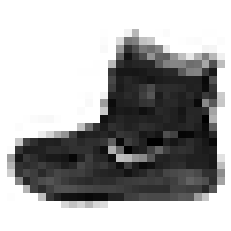

In [6]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

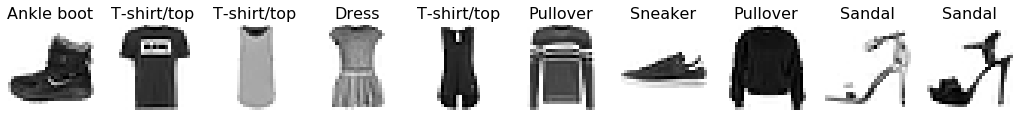

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

In [0]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='a2'></a> 3. Budowa modelu

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**epochs** - ile razy zestaw treningowy zostanie przetworzony przez model.
Przy każdej iteracji optymalizator próbuje dopasować wagi, aby 
funkcja celu została zminimalizowana.
 
**batch_size** - liczba przykładów treningowych po której następuje aktualizacji wag

**validation_split** - procent danych użytych do walidacji

In [10]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 14s 286us/sample - loss: 0.4952 - accuracy: 0.8252 - val_loss: 0.4325 - val_accuracy: 0.8443
Epoch 2/10
48000/48000 [==============================] - 12s 255us/sample - loss: 0.3778 - accuracy: 0.8635 - val_loss: 0.3754 - val_accuracy: 0.8632
Epoch 3/10
48000/48000 [==============================] - 12s 251us/sample - loss: 0.3381 - accuracy: 0.8760 - val_loss: 0.3537 - val_accuracy: 0.8773
Epoch 4/10
48000/48000 [==============================] - 12s 243us/sample - loss: 0.3132 - accuracy: 0.8841 - val_loss: 0.3518 - val_accuracy: 0.8773
Epoch 5/10
48000/48000 [==============================] - 12s 245us/sample - loss: 0.2951 - accuracy: 0.8906 - val_loss: 0.3513 - val_accuracy: 0.8729
Epoch 6/10
48000/48000 [==============================] - 12s 242us/sample - loss: 0.2817 - accuracy: 0.8958 - val_loss: 0.3422 - val_accuracy: 0.8806
Epoch 7/10
48000/48000 [====================

In [11]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.495176,0.825208,0.432536,0.844333,0
1,0.377805,0.863458,0.375435,0.863167,1
2,0.338081,0.876000,0.353664,0.877250,2
3,0.313221,0.884063,0.351810,0.877333,3
4,0.295097,0.890625,0.351310,0.872917,4
5,0.281664,0.895833,0.342232,0.880583,5
6,0.268684,0.900083,0.340489,0.882000,6
7,0.256458,0.903750,0.323349,0.886083,7
8,0.247520,0.907833,0.336610,0.884167,8
9,0.239517,0.909813,0.324805,0.886750,9


### <a name='a3'></a> 4. Ocena modelu

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(test_acc)

0.8783


### <a name='a4'></a> 5. Predykcja na podstawie modelu:
* **model.evaluate(y_true, y_pred)** - pozwala obliczyć metryki modelu
* **model.predict_classes()** - pozwala zwrócić odpowiednio przewidziane klasy
* **model.predict_proba(), model.predict()** - pozwala zwrócić prawdopodobieństwo danej klasy

In [14]:
predictions = model.predict(X_test)
predictions

array([[0.000000000029, 0.000000000003, 0.            , ..., 0.003039132   , 0.000000000103, 0.9961045     ],
       [0.000007439594, 0.            , 0.9993618     , ..., 0.            , 0.000000000003, 0.            ],
       [0.            , 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.000005314836, 0.            , 0.000000327206, ..., 0.            , 0.9999938     , 0.            ],
       [0.000000000003, 0.9999999     , 0.            , ..., 0.            , 0.000000000015, 0.            ],
       [0.00001733119 , 0.000000006017, 0.000027195178, ..., 0.00024932588 , 0.000005610142, 0.000009694169]], dtype=float32)

In [15]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000856,0.000000,0.003039,0.000000,0.996104
1,0.000007,0.000000,0.999362,0.000000,0.000101,0.000000,0.000530,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.075991,0.000000,0.013632,0.001230,0.002501,0.000008,0.906633,0.000000,0.000005,0.000000


In [16]:
predictions_cls = model.predict_classes(X_test)
predictions_cls

array([9, 2, 1, ..., 8, 1, 5])

### <a name='a5'></a> 6. Eksploracja predykcji

In [17]:
#@title Wybierz indeks zdjęcia:
idx = 876 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
    color = 'green'
else:
    color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v', 
                     marker_color=color))
fig.update_layout(width=800, title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

### <a name='a6'></a> 7. Błędnie sklasyfikowane obrazy

In [18]:
#@title Wybierz indeks zdjęcia:

misclassified = []
for idx, _ in enumerate(X_test):
    if predictions_cls[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 74 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, 
                     y=predictions_df.iloc[index_mapper[idx]], 
                     orientation='v', 
                     marker_color='red'))

fig.update_layout(width=800,
                  title=(f' Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                      f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

### <a name='a7'></a> 8. Klika możliwości poprawy modeli:
* zwiększenie liczby epok
* zwiększenie/zmniejszenie parametrów uczenia, stronjenie hiperparametrów
* zwiększenie/zmniejszenie liczby neuronów wewnątrz wartsw uktytych
* zwiększenie/zmniejszenie parametru **batch_size**, czyli rozmiaru wsadu
* zwiększenie/zmniejszenie liczby warstw ukrytych
* zastosowanie regularyzacji (L1 - lasso, L2 - ridge), warstwy Dropout
